In [1]:
import math
import numpy as np
import sklearn.covariance
import pandas as pd
import seaborn
import matgraph
import networkx
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df_raw = pd.read_csv('data/water-treatment.csv', header=None, na_values='?')
df_raw[:5]

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [3]:
df_norm = df_raw.drop(df_raw.columns[0], axis=1)
df = df_norm.dropna()
print('Number of records: ', len(df_raw), '->', len(df))
df[:5]

Number of records:  527 -> 380


,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
8,29156.0,2.5,7.7,206.0,451.0,194.0,69.1,4.5,1249,7.7,...,1338.0,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,39246.0,2.0,7.8,172.0,506.0,200.0,69.0,5.0,1865,7.8,...,1616.0,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6
10,42393.0,0.7,7.9,189.0,478.0,230.0,67.0,5.5,1410,8.1,...,1575.0,0.6,45.8,92.0,11.6,25.7,19.6,36.0,43.0,36.4
14,40923.0,3.5,7.6,146.0,329.0,188.0,57.4,2.5,1300,7.6,...,1545.0,32.7,33.3,90.0,82.6,61.3,87.0,71.4,78.2,99.2


In [4]:
mean = df.mean(axis=0)
std = df.std(axis=0)
for i in range(1, 39):
    df_norm[i] = (df_norm[i] - mean[i]) / std[i]
    df[i] = (df[i] - mean[i]) / std[i]

df[:5]

/home/ytakashina/datasci/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
3,-0.342789,0.525093,0.315869,0.250450,1.561485,-0.294765,0.374517,-0.063891,2.442977,-0.227956,...,0.932863,-0.403717,0.409139,0.521996,0.460589,0.347041,0.123252,0.481069,-0.002119,0.207640
8,-1.199077,0.095652,-0.529415,0.266743,0.399040,-0.277827,0.650968,-0.063891,-0.557492,-0.674468,...,-0.373482,0.467183,-1.180861,0.207854,0.215397,-0.993873,0.490159,-0.551941,0.096486,0.062419
9,0.273558,-0.119068,-0.106773,-0.287239,0.865715,-0.227013,0.643069,0.108054,1.007529,-0.227956,...,0.349952,-1.200925,0.061808,0.017124,0.619242,-0.242581,-0.096892,-1.135287,-0.511577,0.110826
10,0.732863,-0.677341,0.315869,-0.010248,0.628135,0.027056,0.485097,0.280000,-0.148452,1.111580,...,0.243259,-2.580966,-1.011055,0.151757,-10.457656,-4.084632,-12.828564,-5.145796,-7.660418,-15.185756
14,0.518317,0.525093,-0.952057,-0.710873,-0.636129,-0.328641,-0.273166,-0.751675,-0.427920,-1.120981,...,0.165190,-0.430514,-1.975861,-0.072631,-0.217295,-0.699062,-0.463799,-0.843614,-1.875609,0.014013


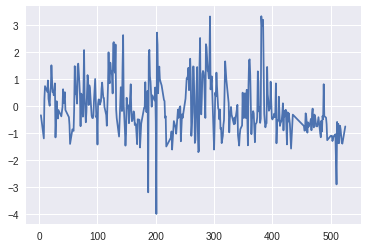

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(df[1])

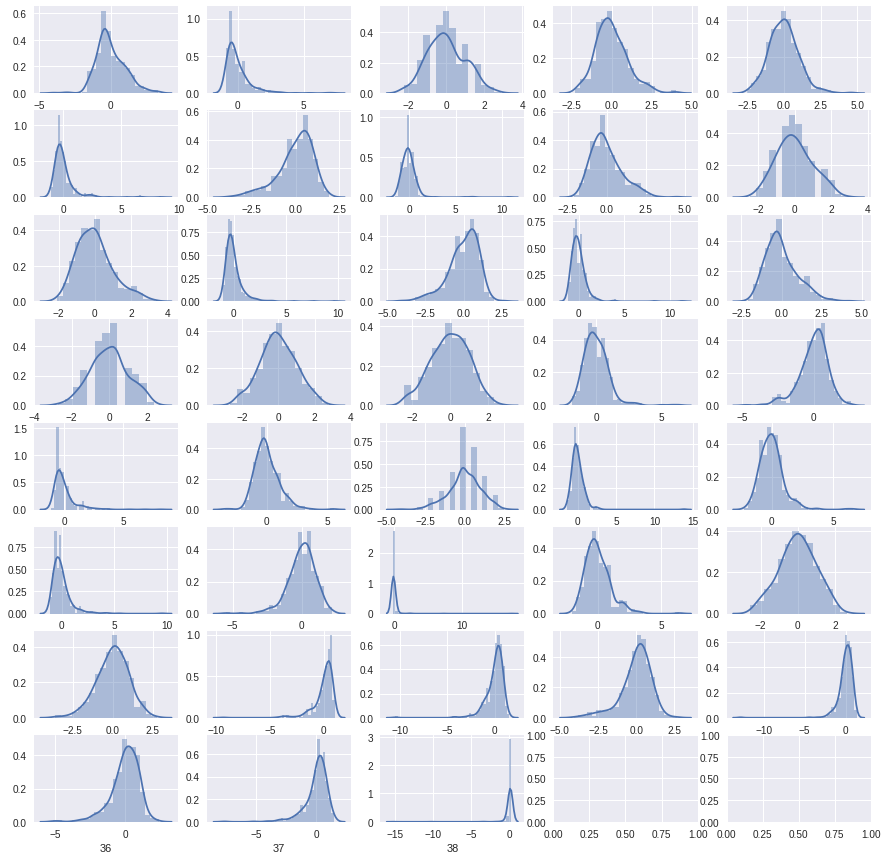

In [6]:
f, axes = plt.subplots(8, 5, figsize=(15, 15))
for i in range(38):
    seaborn.distplot(df[i+1], ax=axes[int(i/5)][int(i%5)])

In [7]:
model = sklearn.covariance.GraphLasso(alpha=0.8, verbose=True)
model.fit(df)

[graph_lasso] Iteration   0, cost  1.77e+02, dual gap 8.498e-01
[graph_lasso] Iteration   1, cost  1.77e+02, dual gap -6.783e-08


GraphLasso(alpha=0.8, assume_centered=False, enet_tol=0.0001, max_iter=100,
      mode='cd', tol=0.0001, verbose=True)

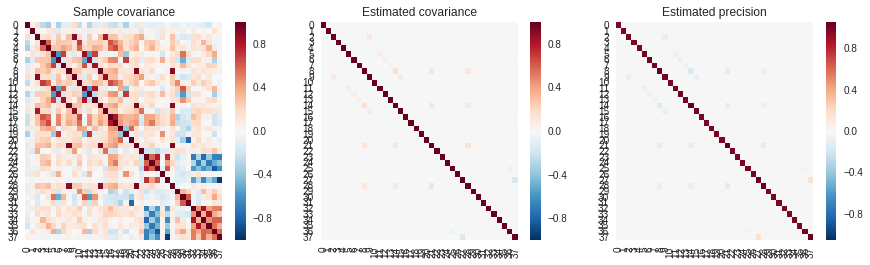

In [8]:
cov = np.cov(df, rowvar=0)
cov_ = model.covariance_
pre_ = model.precision_

f, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].set_title('Sample covariance')
axes[1].set_title('Estimated covariance')
axes[2].set_title('Estimated precision')

seaborn.heatmap(cov, ax=axes[0])
seaborn.heatmap(cov_, ax=axes[1])
seaborn.heatmap(pre_, ax=axes[2])

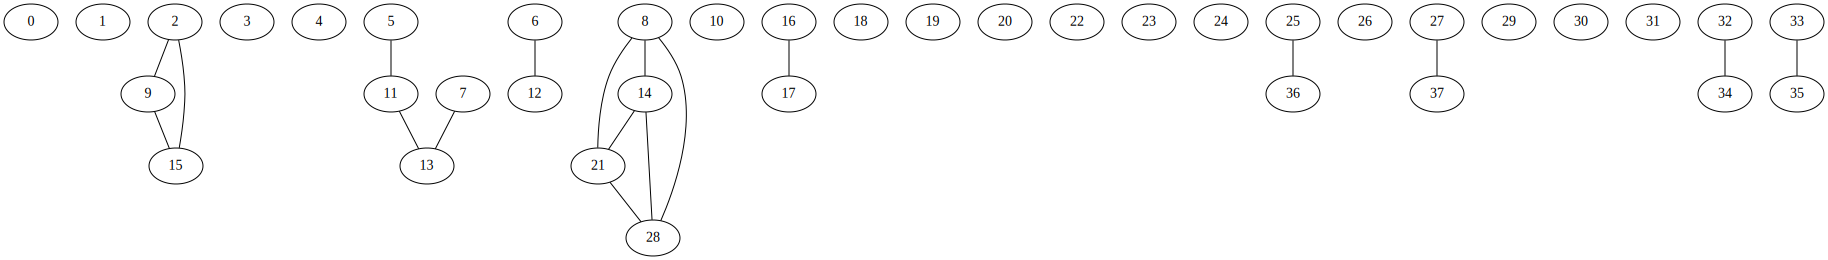

In [9]:
dot = matgraph.from_matrix(pre_, legend='correlation')
dot.render('output/correlation')
dot

/home/ytakashina/datasci/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ytakashina/datasci/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ytakashina/datasci/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ytakashina/datasci/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axe

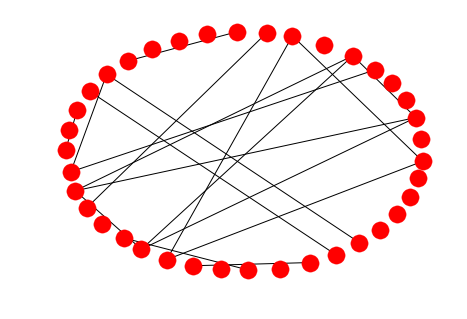

In [10]:
graph = networkx.from_numpy_matrix(pre_)
networkx.draw(graph)

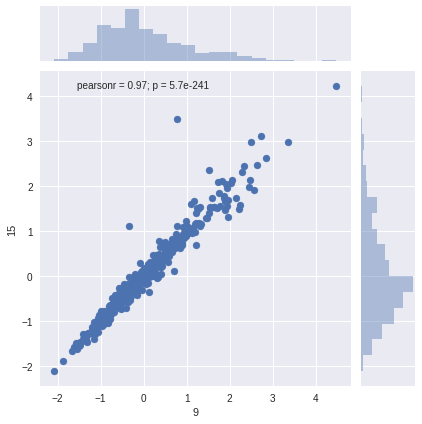

In [11]:
plt.figure(figsize=(6, 4))
seaborn.jointplot(df[9], df[15])
plt.savefig('output/joint.png', dpi=80, transparent=False)

In [12]:
df_scores = pd.DataFrame(columns=df_norm.columns)

for t in df_norm.index:
    row = []
    for i in range(38):
        acc = 0
        for j in range(38):
            if not math.isnan(df_norm[j + 1][t]):
                acc += pre_[i][j] * df_norm[j + 1][t]
        acc = acc**2
        score = 0.5 * math.log(2*math.pi/pre_[i][i]) + 0.5 / pre_[i][i] * acc
        row.append(score)
    df_scores.loc[t] = row

df_scores[:5]

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,1.401199,0.973475,0.921575,0.917621,0.917952,1.041173,0.983854,0.918681,1.602101,0.930347,...,1.362785,0.917621,0.917650,1.066217,0.917425,0.925785,0.917425,0.925826,0.988927,0.909368
1,0.946776,0.965914,1.016497,0.917621,0.972599,0.920186,1.078170,1.088976,3.221816,1.050720,...,3.143191,0.917621,0.927306,1.026438,0.917425,1.586077,0.917425,0.926786,0.993864,0.920851
2,1.200044,1.603003,1.305123,0.917621,1.472839,0.968881,1.121253,1.010573,0.947107,1.051433,...,1.339127,0.917621,0.919081,1.072404,0.917425,2.040249,0.917425,0.963260,0.927723,0.915151
3,0.976528,1.055846,0.971228,0.949066,2.139955,0.960323,0.959678,0.922707,2.854429,0.939769,...,0.992950,0.999330,1.001539,1.054220,1.022692,0.977195,0.923956,1.032837,0.916485,0.920851
4,0.919761,0.973475,1.174816,1.282653,1.223301,1.003734,0.967618,0.942117,1.546964,0.923119,...,1.651254,0.917621,0.960765,1.072404,0.917468,0.942651,1.029066,0.917777,0.975486,0.907232


In [13]:
def calc_pr(predicted, actual):
    n_tp = len(set(predicted) & set(actual))
    n_predicted = len(predicted)
    n_actual = len(actual)
    return (n_tp / n_predicted, n_tp / n_actual)

In [14]:
actual = [10, 11, 12, 78, 148, 186, 209, 292, 395, 398, 401, 441, 442, 443]

predicted = []
for t in df_scores.index:
    anomalous = False
    for i in range(1, 39):
        if df_scores[i][t] > 30:
            anomalous = True
    if anomalous:
        predicted.append(t)

print(set(predicted) & set(actual))
calc_pr(predicted, actual)

{10, 11, 12, 395, 398, 78, 148, 441, 442, 443}


(0.6666666666666666, 0.7142857142857143)

In [15]:
# 閾値法
predicted = []
for t in df_norm.index:
    anomalous = False
    for i in range(1, 39):
        # 平均 0, 標準偏差 1 に正規化されている。
        if df_norm[i][t] > 8 or df_norm[i][t] < -8:
            anomalous = True
    if anomalous:
        predicted.append(t)

print(set(predicted) & set(actual))
calc_pr(predicted, actual)

{10, 11, 12, 395, 398, 78, 148, 441, 442, 443}


(0.6666666666666666, 0.7142857142857143)

In [16]:
for i in predicted:
    line = '['
    for v in df_norm.loc[i, :]:
        if math.isnan(v):
            line += 'NaN, '
        else:
            line += str(int(v)) + ', '
    line = line[:-2] + ']'
    print(line)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 13, 6, 9, 0, 17, 0, -2, -1, 0, -10, -4, -12, -5, -7, -15]
[0, 0, 0, 0, 0, 0, -2, 0, 0, -1, 0, 0, -2, 0, 0, -1, 0, 0, 0, -2, 0, 0, -2, 31, 7, 18, 0, 9, 0, 0, 0, 0, NaN, NaN, NaN, NaN, -11, -13]
[0, 0, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, -1, 6, 2, 7, 0, 0, 0, 0, 0, 0, NaN, -4, -11, -5, -13, 0]
[0, 0, 0, 0, 0, 6, -2, 6, 0, 0, 0, 7, -2, 8, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0]
[-1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 2, 0, 1, 0, 0, -2, 1, 1, 0, 0, 1, 0, -2, 2, 3, 4, 0, 7, 0, 0, -3, -3, -1, -2, -1, -4, -5, -10]
[0, 0, 0, -1, -1, 0, NaN, 0, 0, 0, -1, 0, NaN, 0, 0, 0, 0, -1, 0, NaN, 0, 0, 1, 0, 0, 4, NaN, 0, 0, 0, 0, 0, 0, -2, 0, -1, -8, -2]
[-1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 12, 0, NaN, 0, 0, 0, 0, 0, -1, -1, 0, NaN, 0, NaN, 0, 0]
[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 6, 0, 0, 0, -1, 0, 0, 0, 0, 0, -2, -9, 0, 1, 0

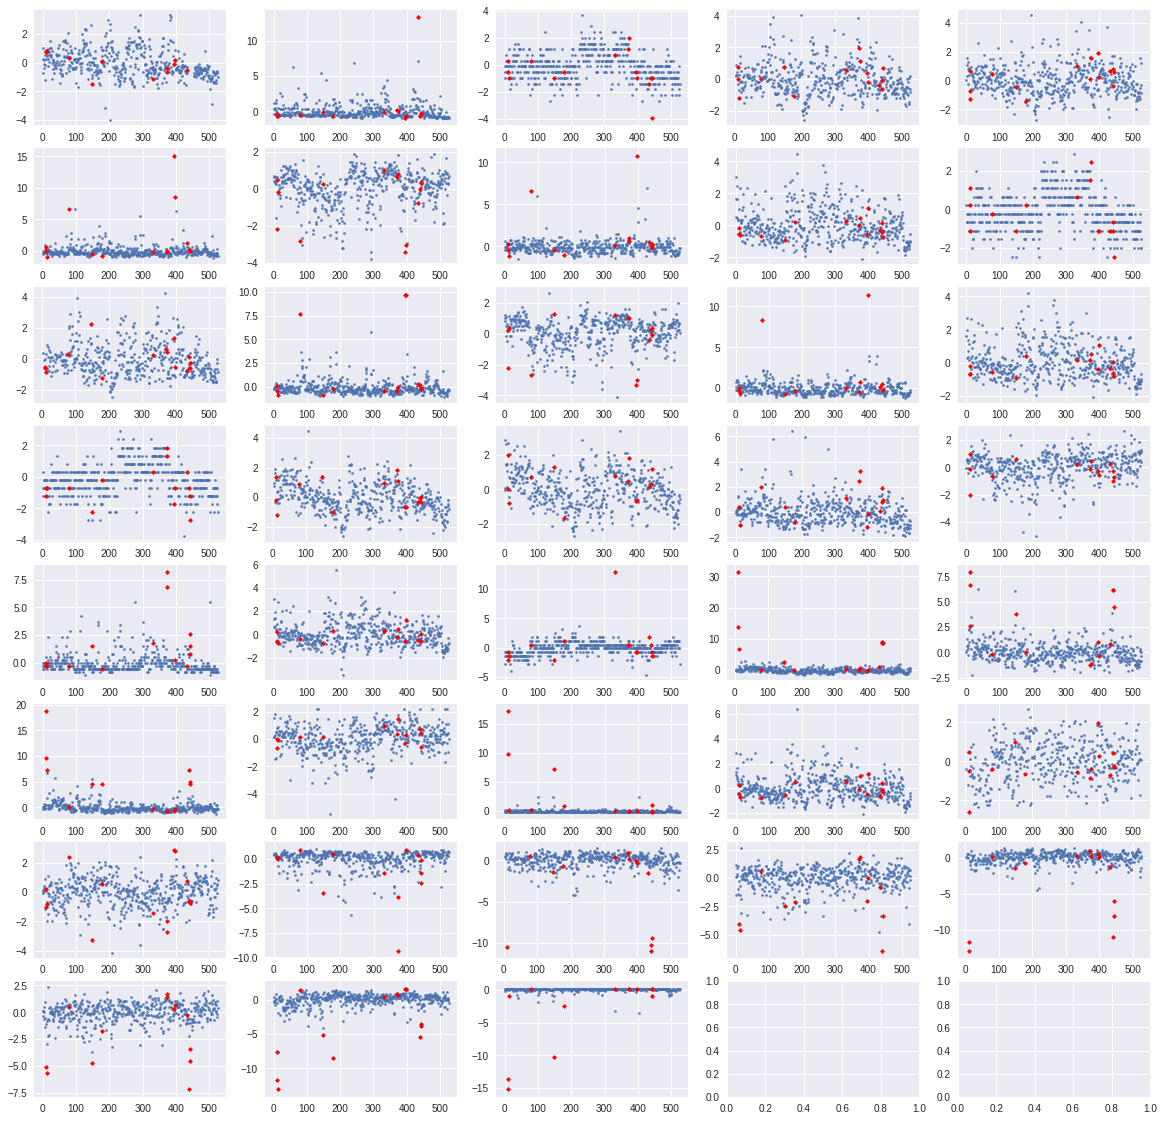

In [17]:
f, axes = plt.subplots(8, 5, figsize=(20, 20))
for i in range(38):
    axes[int(i/5)][int(i%5)].scatter(df_norm.index, df_norm[i+1], s=5)
    axes[int(i/5)][int(i%5)].scatter(predicted, [df_norm[i+1][j] for j in predicted], c='red', s=10, marker='D')

In [18]:
unexpected = list(set(actual) - set(predicted))
unexpected

[186, 209, 401, 292]

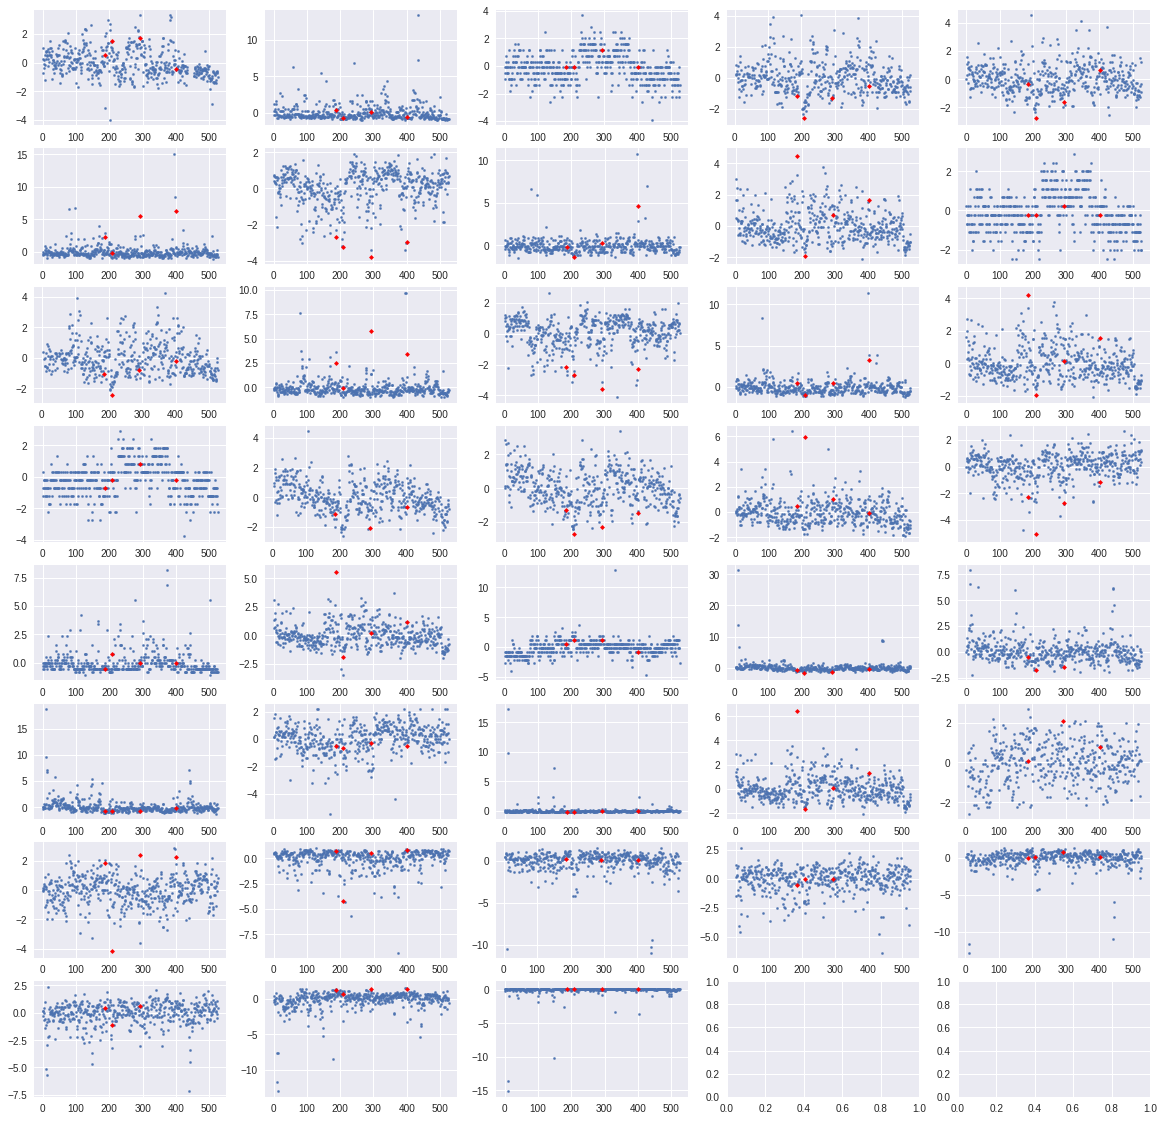

In [19]:
f, axes = plt.subplots(8, 5, figsize=(20, 20))
for i in range(38):
    axes[int(i/5)][int(i%5)].scatter(df_norm.index, df_norm[i+1], s=5)
    axes[int(i/5)][int(i%5)].scatter(unexpected, [df_norm[i+1][j] for j in unexpected], c='red', s=10, marker='D')